<a href="https://colab.research.google.com/github/natdebandi/hate_speech_ar/blob/main/3_GPT_evaluate_finetuning_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP final - reconocimiento de discursos discriminatorios en Twitter

## Evaluacion y recuperación del modelo con finetunning multi-etiqueta

**Natalia Dedandi**


Esta notebook se usa para recuperar el modelo de finetuning de GPT y evaluarlos en relación a los datos de test para la clasificacion multietiqueta



La documentación de la API se encuentra aqui:

https://platform.openai.com/docs/api-reference/introduction



In [1]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.7/360.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00


In [2]:
!pip install datasets seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requir

In [3]:
import json
from openai import OpenAI
import os
from google.colab import userdata
#seteo la KEY
os.environ['OPENAI_API_KEY'] = userdata.get('openIA_key')




In [4]:
#creo el cliente OPENAI con mi usuario y proyecto
client = OpenAI(
  organization='org-1uHjwiaB3OlPzoxfVzhqOSzs',
  project='proj_2fII7izwVGgYaERNNKhhMx4l',
)


El siguiente ID corresponde al resultado del finetuning del modelo multiclase v1

BATCH ID ftjob-bBGZMy7TEwRbkZgTlCXd2nYw







In [5]:
model_ft_multi=client.fine_tuning.jobs.retrieve('ftjob-bBGZMy7TEwRbkZgTlCXd2nYw')

In [6]:
model_ft_multi

FineTuningJob(id='ftjob-bBGZMy7TEwRbkZgTlCXd2nYw', created_at=1723322099, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal:hatemultiv4:9uouAqOs', finished_at=1723329072, hyperparameters=Hyperparameters(n_epochs=2, batch_size=48, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-1uHjwiaB3OlPzoxfVzhqOSzs', result_files=['file-ab2DqKK0JFzQ4VPGlSukj8wS'], seed=121411614, status='succeeded', trained_tokens=14873298, training_file='file-R82RagvEYz2teWwC9qRBx12Q', validation_file='file-owHvdiZn5mxubs7bsO6ibuxp', estimated_finish=None, integrations=[], user_provided_suffix='hatemultiv4')

El ID del modelo es:

ft:gpt-3.5-turbo-0125:personal:hatemultiv4:9uouAqOs

Aca debo obtener el archivo de resultado del modelo

In [7]:
#result_files=['file-LrrG9erjq0phdN2C09yLtKCc']

content = client.files.content('file-ab2DqKK0JFzQ4VPGlSukj8wS')


In [9]:
import base64
base64.b64decode(content.text.encode("utf-8"))

with open("result.csv", "wb") as f:
  f.write(base64.b64decode(content.text.encode("utf-8")))

In [10]:
# prompt: open the results csv file and put it in a dataframe

import pandas as pd
df = pd.read_csv('result.csv')

In [11]:
df

,step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy
0,1,10.47837,0.51923,NaN,NaN
1,2,7.50112,0.60000,NaN,NaN
2,3,9.19233,0.55263,NaN,NaN
3,4,10.00374,0.54630,NaN,NaN
4,5,8.70994,0.57377,NaN,NaN
...,...,...,...,...,...
1513,1514,0.16822,0.94366,NaN,NaN
1514,1515,0.08783,0.98000,NaN,NaN
1515,1516,0.13261,0.96396,NaN,NaN
1516,1517,0.09835,0.96296,NaN,NaN


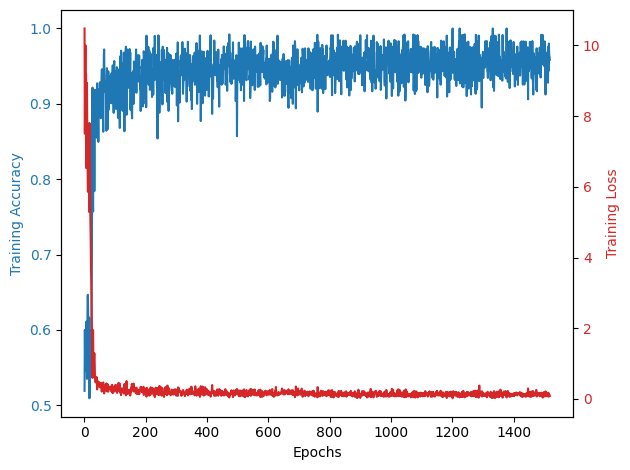

In [12]:
# prompt: graph train_accuracy and train_loss in the same graph

import matplotlib.pyplot as plt

# Extract the relevant data from the DataFrame
train_accuracy = df['train_accuracy']
train_loss = df['train_loss']
epochs = range(1, len(train_accuracy) + 1)

# Create the plot
fig, ax1 = plt.subplots()

# Plot the training accuracy
color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy', color=color)
ax1.plot(epochs, train_accuracy, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a twin axis for the training loss
ax2 = ax1.twinx()

# Plot the training loss
color = 'tab:red'
ax2.set_ylabel('Training Loss', color=color)
ax2.plot(epochs, train_loss, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
fig.tight_layout()
plt.show()

In [13]:
# prompt: crear una función que obtenga la última métrica de df result

def get_last_metrics(df):
  """
  Obtiene las últimas métricas del DataFrame.

  Args:
    df: El DataFrame que contiene las métricas.

  Returns:
    Un diccionario con las últimas métricas.
  """
  last_row = df.iloc[-1]
  return {
      'train_loss': last_row['train_loss'],
      'train_accuracy': last_row['train_accuracy'],
  }

# Ejemplo de uso
last_metrics = get_last_metrics(df)
print(last_metrics)

{'train_loss': 0.08359, 'train_accuracy': 0.95833}


Aplico el modelo con finetuning al conjunto de test de nuevo para obtener la clasificación y poder calcular las métricas

In [14]:
!pip install datasets seaborn

In [15]:
from datasets import load_dataset
import pandas as pd

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/36420 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11343 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/9106 [00:00<?, ? examples/s]

In [16]:
df_test = pd.DataFrame(ds1['test'])
df_test[0:5]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
0,397703,Mora Godoy cierra su escuela de tango y remata...,@usuario Ojalá se funda y cague de hambre,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,0,0,0,0,0
2,397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
3,397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
4,397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0


In [33]:
def create_batch_multiple(df):
  # Specify the columns
  id_column = 'id'
  text_column = 'text'

  # Convert the dataframe into a list of dictionaries with custom_id and messages
  batch = [
      {
          'custom_id': str(row[id_column]),
          'method': 'POST',
          'url': '/v1/chat/completions',
          'body':{
              'model': 'ft:gpt-3.5-turbo-0125:personal:hatemultiv4:9uouAqOs',
              'messages': [
                  {'role': 'system', 'content': 'You are trained to analyze and detect the sentiment of the given text.You must classify a text with one or more of the following labels: WOMEN when there is discrimination against women, LGBTI when there is discrimination against gays, lesbians or transsexuals, RACISM when there is discrimination against people according to their skin color, CLASS  when there is discrimination for being poor or living in a marginal or poor place, POLITICS is hatred of politicians, DISABLED when there is discrimination against people with disabilities, APPEARENCE when there is discrimination against people because of their physical appearance, specifically fatphobia, CRIMINAL when there is discrimination against people because of a criminal record or links to criminality and  CALLS is hateful text that incites violence. If the text is not hateful indicate NOT HATEFUL'},
                  {'role': 'user', 'content': row[text_column]}
                  ],
              'max_tokens': 20,  # Limit response to a single word
              'temperature': 0  # Keep response consistent
          }
      }
      for _, row in df.iterrows()
  ]
  return(batch)

In [34]:
import numpy as np
def split_df(df):
  if len(df) % 2 != 0:  # Handling `df` with `odd` number of rows
    df = df.iloc[:-1, :]
    df1, df2 =  np.array_split(df, 2)
    return df1, df2

In [35]:
df1, df2 = split_df(df_test)

In [36]:
len(df2)

5671

PREPARO EL ARCHIVO PARA ENVIAR BATCH Y LE PASO EL ID DEL MODELO


In [37]:
batch1=create_batch_multiple(df1)
batch1[0]

{'custom_id': '397703',
 'method': 'POST',
 'url': '/v1/chat/completions',
 'body': {'model': 'ft:gpt-3.5-turbo-0125:personal:hatemultiv4:9uouAqOs',
  'messages': [{'role': 'system',
    'content': 'You are trained to analyze and detect the sentiment of the given text.You must classify a text with one or more of the following labels: WOMEN when there is discrimination against women, LGBTI when there is discrimination against gays, lesbians or transsexuals, RACISM when there is discrimination against people according to their skin color, CLASS  when there is discrimination for being poor or living in a marginal or poor place, POLITICS is hatred of politicians, DISABLED when there is discrimination against people with disabilities, APPEARENCE when there is discrimination against people because of their physical appearance, specifically fatphobia, CRIMINAL when there is discrimination against people because of a criminal record or links to criminality and  CALLS is hateful text that incit

In [38]:
batch2=create_batch_multiple(df2)
batch2[0]

{'custom_id': '398942',
 'method': 'POST',
 'url': '/v1/chat/completions',
 'body': {'model': 'ft:gpt-3.5-turbo-0125:personal:hatemultiv4:9uouAqOs',
  'messages': [{'role': 'system',
    'content': 'You are trained to analyze and detect the sentiment of the given text.You must classify a text with one or more of the following labels: WOMEN when there is discrimination against women, LGBTI when there is discrimination against gays, lesbians or transsexuals, RACISM when there is discrimination against people according to their skin color, CLASS  when there is discrimination for being poor or living in a marginal or poor place, POLITICS is hatred of politicians, DISABLED when there is discrimination against people with disabilities, APPEARENCE when there is discrimination against people because of their physical appearance, specifically fatphobia, CRIMINAL when there is discrimination against people because of a criminal record or links to criminality and  CALLS is hateful text that incit

In [40]:
# Save the batch to a .jsonl file
with open('batch_fine_multilabel_1.jsonl', 'w') as f:
    for entry in batch1:
        json.dump(entry, f)
        f.write('\n')

print("Batch file created successfully in .jsonl format!")

Batch file created successfully in .jsonl format!


In [42]:
batch_input_file = client.files.create(
  file=open("batch_fine_multilabel_1.jsonl", "rb"),
  purpose="batch"
)

In [43]:
batch_input_file

FileObject(id='file-4ePZeTRdQ2vgxtpXexhhdfNW', bytes=6922851, created_at=1723333846, filename='batch_fine_multilabel_1.jsonl', object='file', purpose='batch', status='processed', status_details=None)

In [44]:
batch_input_file_id = 'file-4ePZeTRdQ2vgxtpXexhhdfNW'

client.batches.create(
    input_file_id=batch_input_file_id,
    endpoint="/v1/chat/completions",
    completion_window="24h",
    metadata={
      "description": "nightly eval job"
    }
)

Batch(id='batch_B8vfhAUNxb0TiUCJfJNxXSiD', completion_window='24h', created_at=1723333869, endpoint='/v1/chat/completions', input_file_id='file-4ePZeTRdQ2vgxtpXexhhdfNW', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1723420269, failed_at=None, finalizing_at=None, in_progress_at=None, metadata={'description': 'nightly eval job'}, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))